# Exercise 11: Hierarchies of stocks

Previously, you used k-means clustering to cluster companies according to their stock price movements. This time, perform _hierarchical_ clustering of the companies.  You are given a NumPy array of price movements `movements`, where the rows correspond to companies, and a list of the company names `companies`.

SciPy hierarchical clustering doesn't fit into a sklearn pipeline, so you'll need to use the `normalize()` function from `sklearn.preprocessing` instead of `Normalizer`.

**Step 1:** Load the data _(written for you)_

In [14]:
import pandas as pd

fn = '../datasets/company-stock-movements-2010-2015-incl.csv'
stocks_df = pd.read_csv(fn, index_col=0)

companies = list(stocks_df.index)
movements = stocks_df.values

In [13]:
stocks_df.head()

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,-0.709999,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


**Step 2:** Make the necessary imports:

 + `normalize` from `sklearn.preprocessing`.
 + `linkage` and `dendrogram` from `scipy.cluster.hierarchy`.
 + `matplotlib.pyplot` as `plt`.

In [5]:
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt


**Step 3:** Rescale the price movements for each stock by using the `normalize()` function on `movements`.

In [19]:
normalized_movements = normalize(movements, norm='l2', axis=0)

array([[ 0.10280701, -0.03591014, -0.18474461, ..., -0.32913755,
         0.11335982, -0.72883059],
       [-0.11344257, -0.10609573, -0.01137729, ..., -0.00245633,
        -0.05397991,  0.02455481],
       [-0.4165467 ,  0.20566397, -0.12731706, ...,  0.29413862,
        -0.23751165,  0.13914468],
       [ 0.01949735,  0.        ,  0.01408622, ...,  0.11360232,
         0.0053981 ,  0.02009033]])

**Step 4:** Apply the `linkage()` function to `normalized_movements`, using `'complete'` linkage, to calculate the hierarchical clustering. Assign the result to `mergings`.

In [29]:
mergings = linkage(normalized_movements, method='complete', metric='euclidean')
mergings

array([[ 34.        ,  58.        ,   0.4745991 ,   2.        ],
       [ 50.        ,  60.        ,   0.64695066,   3.        ],
       [  5.        ,  16.        ,   0.73204914,   2.        ],
       [ 14.        ,  61.        ,   0.76454674,   4.        ],
       [ 15.        ,  62.        ,   0.83512733,   3.        ],
       [ 63.        ,  64.        ,   0.87347221,   7.        ],
       [ 39.        ,  52.        ,   0.88780986,   2.        ],
       [ 11.        ,  65.        ,   0.90681394,   8.        ],
       [ 21.        ,  45.        ,   0.92322642,   2.        ],
       [ 66.        ,  67.        ,   0.95058571,  10.        ],
       [ 47.        ,  69.        ,   0.96895242,  11.        ],
       [  7.        ,  68.        ,   1.0081555 ,   3.        ],
       [ 24.        ,  70.        ,   1.02479418,  12.        ],
       [ 19.        ,  46.        ,   1.04069476,   2.        ],
       [ 42.        ,  49.        ,   1.10039442,   2.        ],
       [ 33.        ,  72

**Step 5:** Plot a dendrogram of the hierarchical clustering, using the list `companies` of company names as the `labels`. In addition, specify the `leaf_rotation=90`, and `leaf_font_size=10` keyword arguments as you did in the previous exercise.

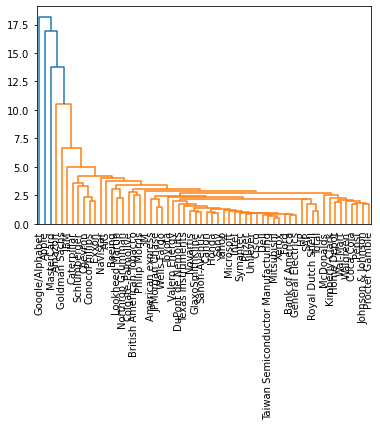

In [36]:
dend = dendrogram(mergings, p=30, labels=companies, leaf_font_size=10, leaf_rotation=90)
dend
plt.show()